# Assignment 5 

## The Data

The data being used is from the CORGIS datasets and is about cars and the amount of fuel they use. <br> The data could be found here: https://corgis-edu.github.io/corgis/csv/cars/

### Import Pandas and Read in Cars

In [53]:
import pandas as pd
import numpy as np
df = pd.read_csv('cars.csv')

### Mean, Median, Mode

In [3]:
df.describe()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


In [4]:
df['Fuel Information.Highway mpg'].mean()

24.125492513790388

In [5]:
df['Fuel Information.Highway mpg'].median()

24.0

In [6]:
df['Fuel Information.Highway mpg'].mode()

0    25
Name: Fuel Information.Highway mpg, dtype: int64

### Trimmed Mean 

Sorting the values from smallest to largest and taking away the top and bottom 10 percent of the data

In [9]:
df2 = df.sort_values(by='Fuel Information.Highway mpg',ignore_index=True).copy()

In [10]:
df2['Fuel Information.Highway mpg']

0        11
1        11
2        11
3        11
4        11
       ... 
5071     42
5072     42
5073     42
5074     43
5075    223
Name: Fuel Information.Highway mpg, Length: 5076, dtype: int64

In [28]:
df2.loc[int(0.1*5075):int(0.9*5075),'Fuel Information.Highway mpg'].mean()

23.904210785520807

<AxesSubplot:ylabel='Frequency'>

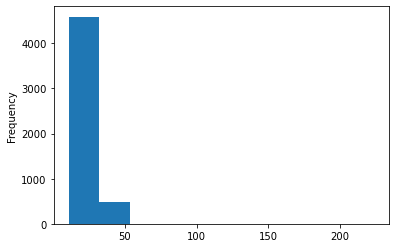

In [12]:
df['Fuel Information.Highway mpg'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

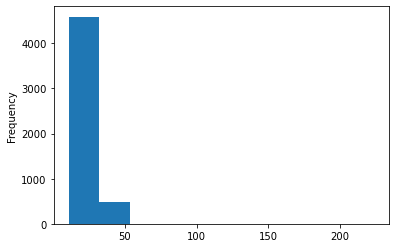

In [13]:
df2['Fuel Information.Highway mpg'].plot(kind='hist')

The mean for the regular Fuel Information is around 24.13 and the median and mode is found at 24.0 and 25. When looking at the trimmed set of data, the mean decreases to around 23.90

### Mean Absolute Deviation, Standard Deviation, Interquartile Range

In [17]:
df['Fuel Information.Highway mpg'].mad()

4.749391363178941

In [14]:
df['Fuel Information.Highway mpg'].std()

6.488292772920855

In [15]:
df['Fuel Information.Highway mpg'].quantile(0.25)

20.0

In [16]:
df['Fuel Information.Highway mpg'].quantile(0.75)

28.0

Interquartile Range: 8 <br>
Interquartile Range is Q3 - Q1 which is 28.0 - 20.0, so the interquartile range is 8

### Boxplot of COL1 (Fuel Information.Highway mpg)

<AxesSubplot:>

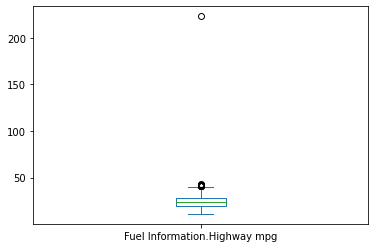

In [27]:
df['Fuel Information.Highway mpg'].plot(kind='box')

Here it can be seen that there is a big jump from the from the maximum number and the 3rd quartile. The 3rd quartile is at 28 while the maximum number is 223. The 1st and 3rd quartiles are set pretty well on the graph, however, the y-axis is so spread apart that the boxes look smaller.

### COL1 Mean Split

In [64]:
conditions = [
    (df['Fuel Information.Highway mpg'] < 12.065),
    (df['Fuel Information.Highway mpg'] >= 12.065) & (df['Fuel Information.Highway mpg'] < 24.13),
    (df['Fuel Information.Highway mpg'] >= 24.13) 
    ]

# create a list of the values we want to assign for each condition
values = [0, 1, 2]

# create a new column and use np.select to assign values to it using our lists as arguments
df['COL1_MeanSplit'] = np.select(conditions, values)


In [73]:
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,COL1_MeanSplit
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236,2
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207,2
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207,2
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207,2
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253,2
5072,141,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup,2012,552,398,1
5073,160,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo LP 560-4 Spyder,Lamborghini,2012 Lamborghini Gallardo Spyder,2012,552,398,1
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330,2


### Barplot of COL1 Mean Split

<AxesSubplot:>

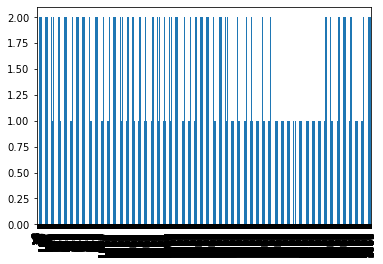

In [66]:
df['COL1_MeanSplit'].plot(kind='bar')

<AxesSubplot:>

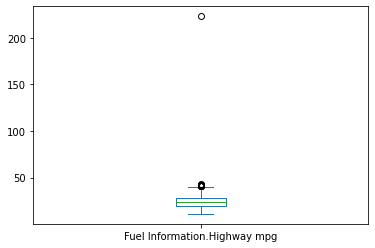

In [59]:
df.sort_values(by='COL1_MeanSplit').plot(x='COL1_MeanSplit',y='Fuel Information.Highway mpg',kind = 'box')

### COL 3

#### Correlation between COL1 and COL3

In [71]:
np.corrcoef(df['Fuel Information.Highway mpg'],df['Engine Information.Engine Statistics.Horsepower'])

array([[ 1.        , -0.54819957],
       [-0.54819957,  1.        ]])

#### Scatter Plot of COL1 and COL3

<AxesSubplot:xlabel='Fuel Information.Highway mpg', ylabel='Engine Information.Engine Statistics.Horsepower'>

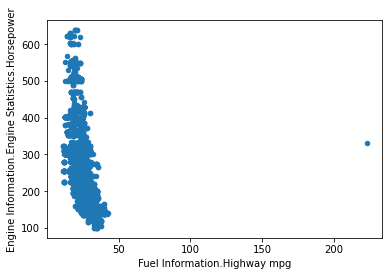

In [72]:
df.plot(kind='scatter',
        x='Fuel Information.Highway mpg',
        y='Engine Information.Engine Statistics.Horsepower')

There is a negative correlation between these two variables. AS the fuel infomation increases, it shows a steep trend of the engine horsepower decreasing.

#### Hexbin of COL1 vs COL3

Text(0, 0.5, 'Horsepower')

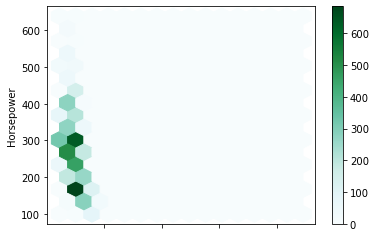

In [74]:
ax = df.plot.hexbin('Fuel Information.Highway mpg', 'Engine Information.Engine Statistics.Horsepower', gridsize=15)
ax.set_xlabel("Fuel Information")
ax.set_ylabel("Horsepower")
